In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [2]:
record=pd.read_csv("StudentsPerformance.csv")
print(record.shape)

(1000, 8)


In [3]:
record

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
record.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [5]:
no_of_columns=record.shape[0]
record.isna().sum()/no_of_columns

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [6]:
record.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [7]:
record.index

RangeIndex(start=0, stop=1000, step=1)

In [8]:
record.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
record.corr()

/tmp/ipykernel_36153/3783554818.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  record.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


/tmp/ipykernel_36153/3309087481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(record.corr())


<Axes: >

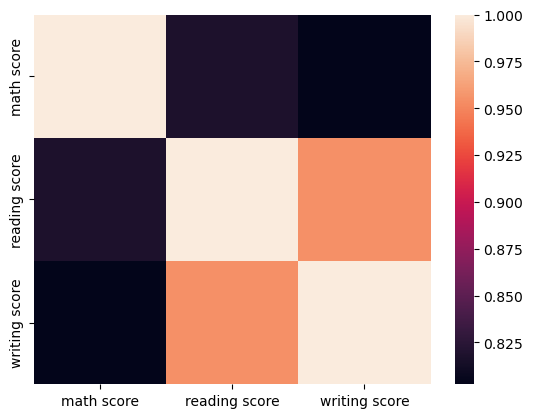

In [10]:
sns.heatmap(record.corr())

In [11]:
record['Percentage']=(record['math score']+record['reading score']+record['writing score'])/3

In [12]:
record

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


/tmp/ipykernel_36153/1146059243.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(record.corr(),annot=True)


<Axes: >

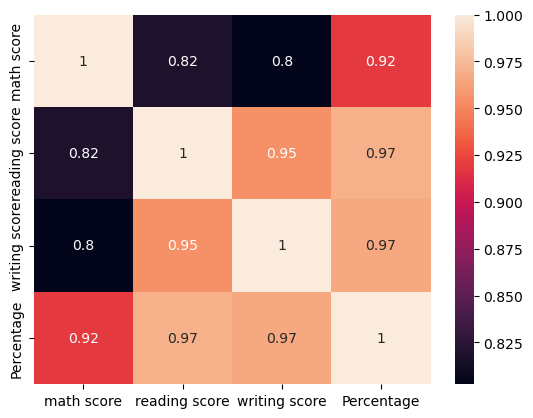

In [13]:
sns.heatmap(record.corr(),annot=True)

(array([  1.,   0.,   1.,   4.,   8.,   4.,  16.,  24.,  45.,  79.,  92.,
         86., 129., 133., 110., 100.,  76.,  46.,  24.,  22.]),
 array([  9.  ,  13.55,  18.1 ,  22.65,  27.2 ,  31.75,  36.3 ,  40.85,
         45.4 ,  49.95,  54.5 ,  59.05,  63.6 ,  68.15,  72.7 ,  77.25,
         81.8 ,  86.35,  90.9 ,  95.45, 100.  ]),
 <BarContainer object of 20 artists>)

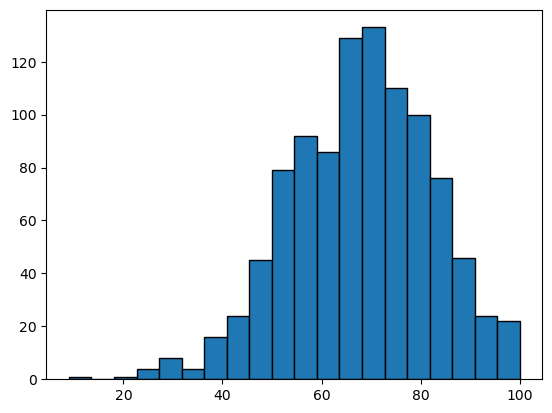

In [14]:
plt.hist(record.Percentage,edgecolor='black',bins=20)

Target looks like regression


/home/arshia/anaconda3/lib/python3.10/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9686407903917175) feature reading score. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/home/arshia/anaconda3/lib/python3.10/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9591837691852061) feature writing score. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.09E-01'}, xlabel='Percentage', ylabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.03E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.22E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=3.02E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=1.26E-02'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

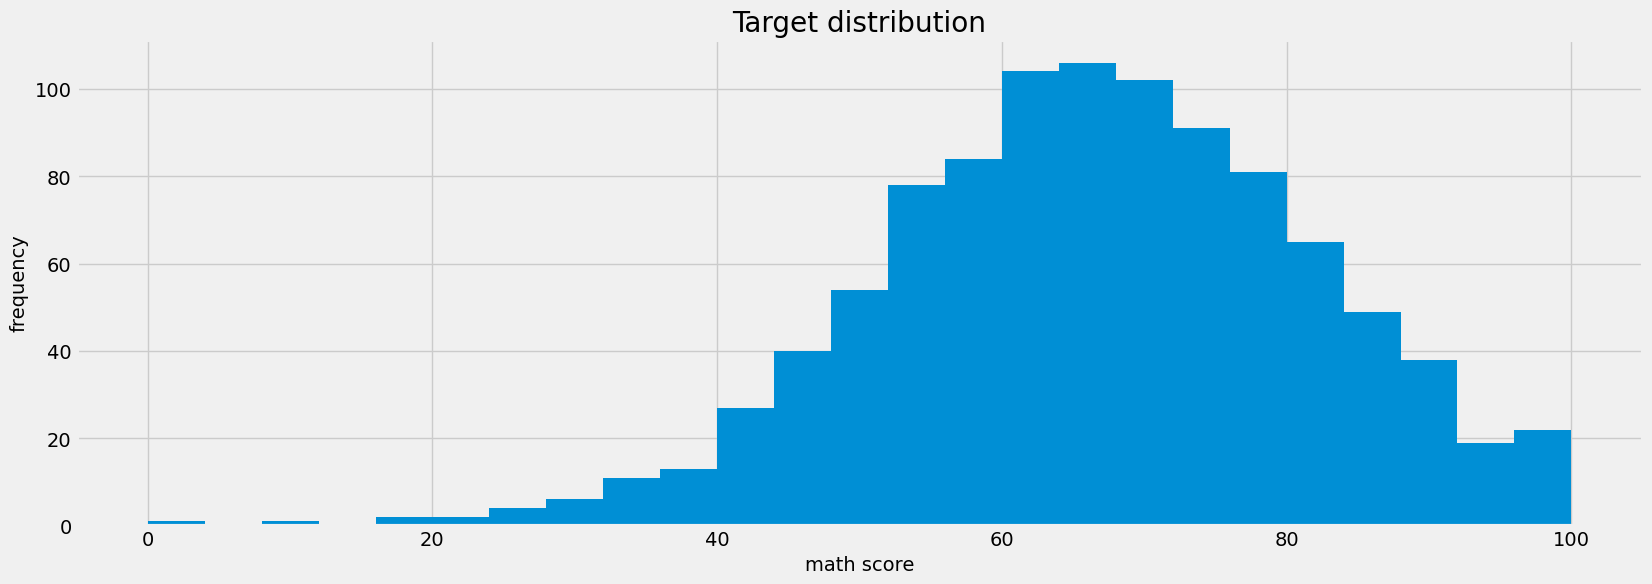

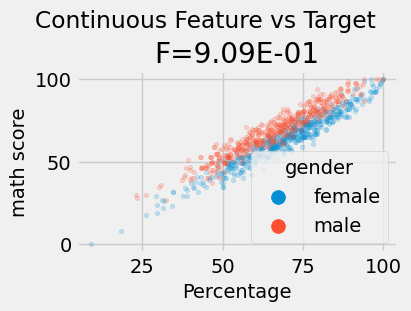

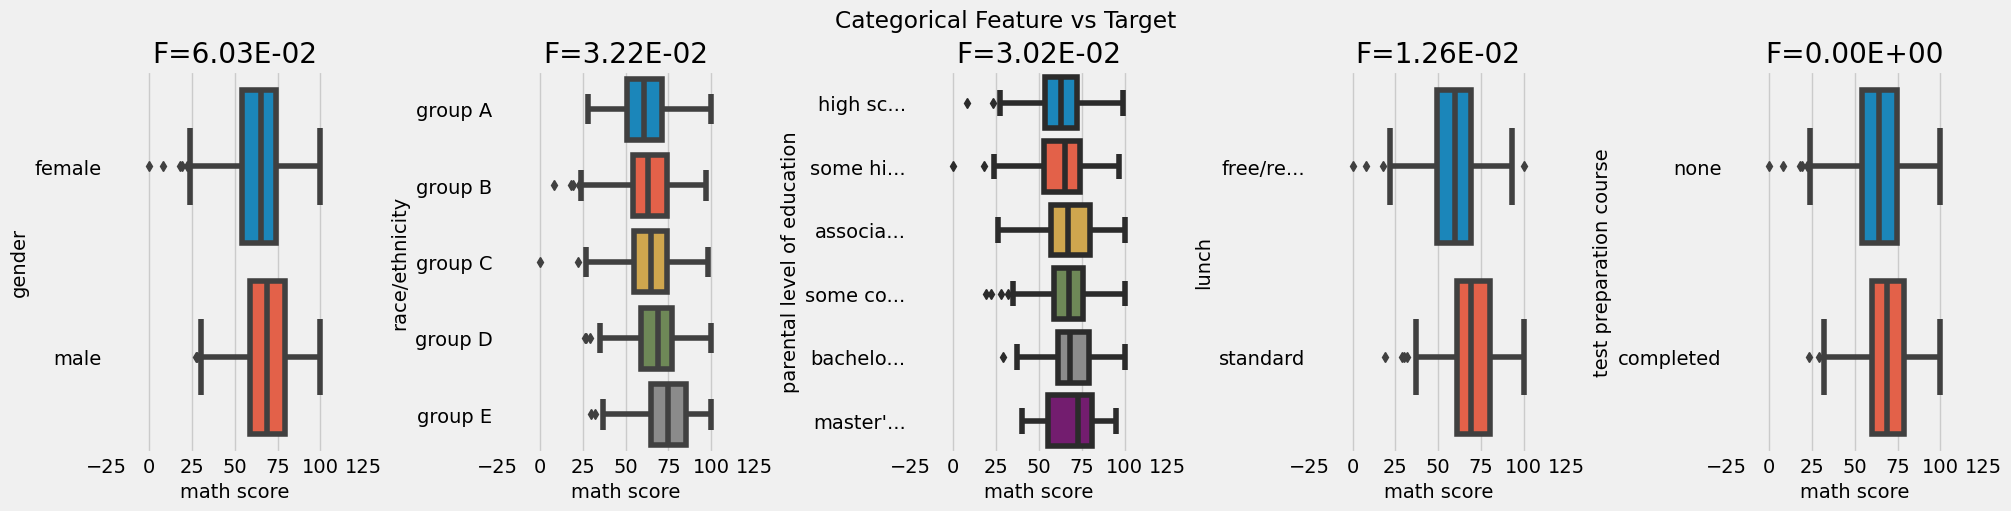

In [15]:
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('fivethirtyeight')
dabl.plot(record, target_col='math score')

Target looks like regression


/home/arshia/anaconda3/lib/python3.10/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9591837691852061) feature writing score. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.69E-01'}, xlabel='Percentage', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=3.85E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.81E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=3.29E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=5.32E-03'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=7.70E-05'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

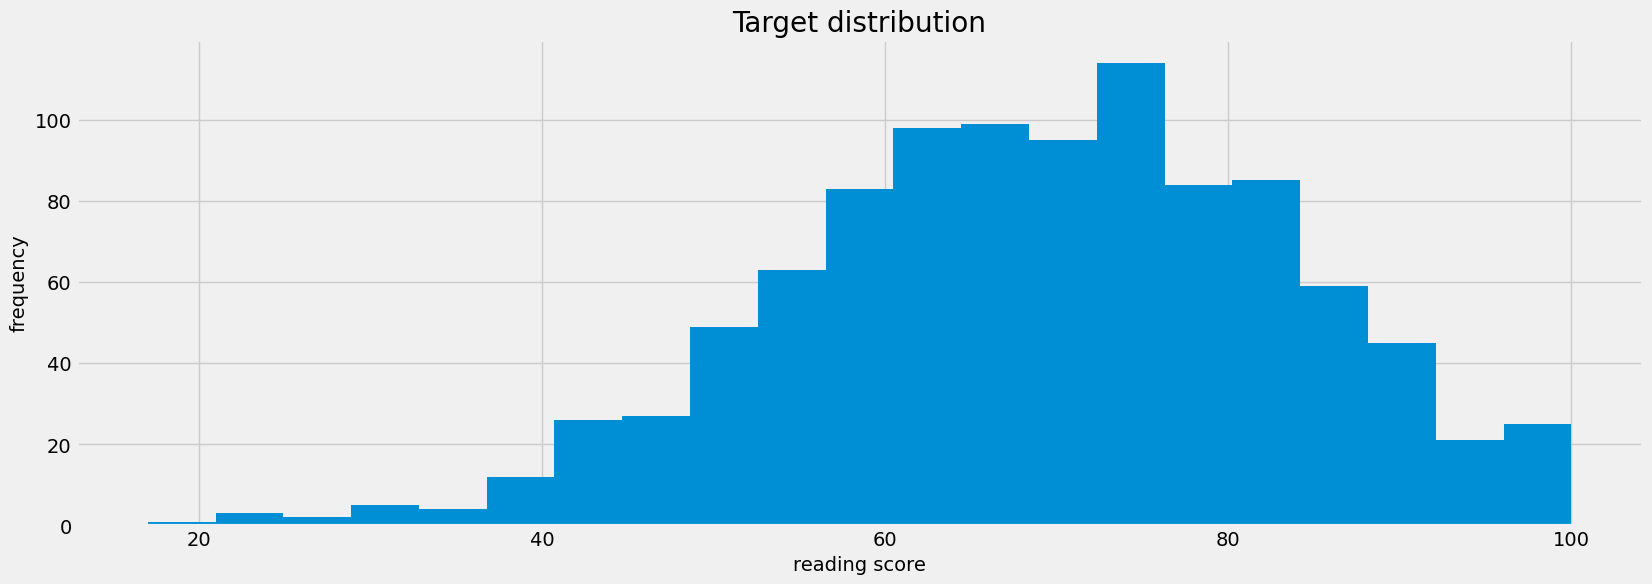

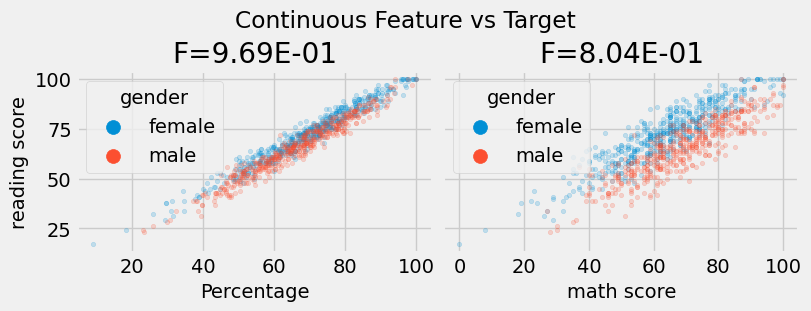

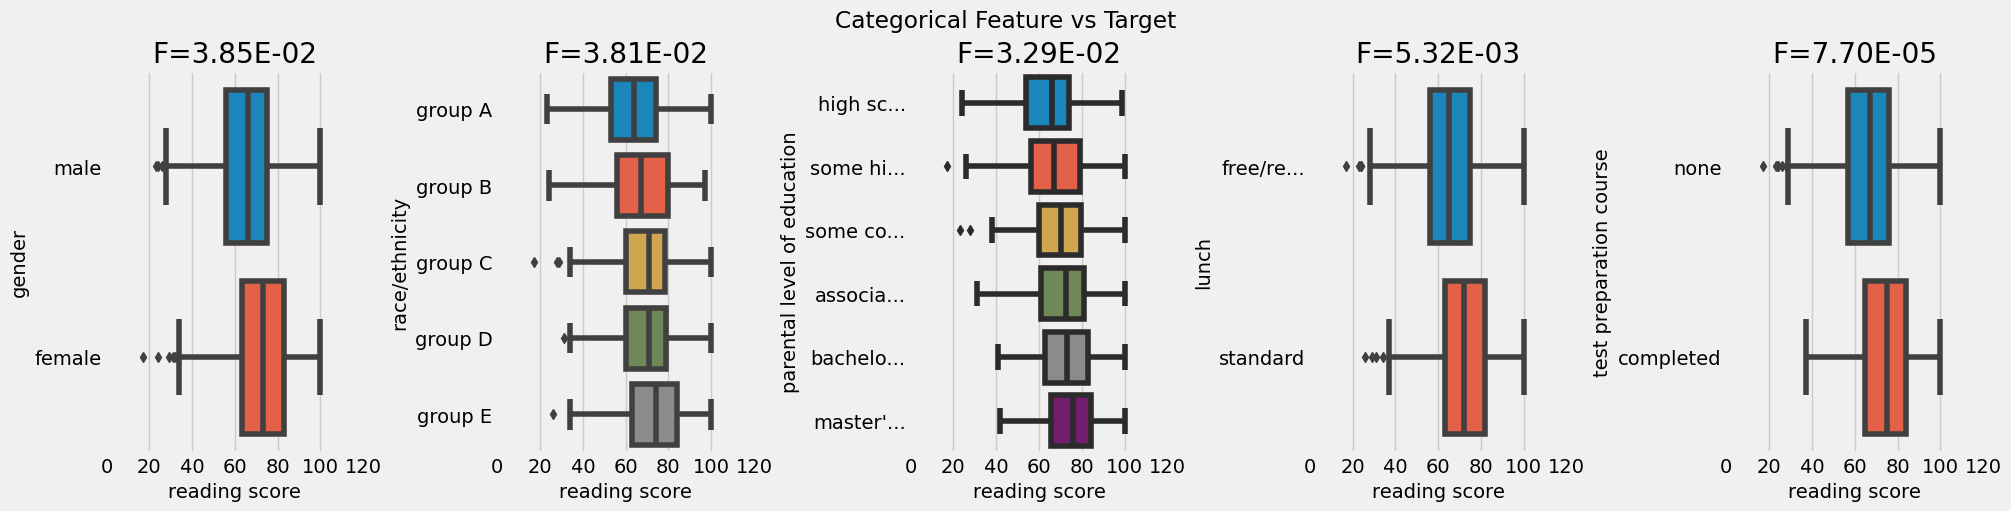

In [16]:
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('fivethirtyeight')
dabl.plot(record, target_col='reading score')

In [17]:
record[['lunch','gender','writing score','reading score','math score']].groupby(['lunch','gender']).agg('median')

writing score  reading score  math score
lunch        gender                                          
free/reduced female           68.0           67.0        57.0
             male             59.0           61.0        62.0
standard     female           76.0           75.0        67.0
             male             67.0           67.5        72.0

In [18]:
record[['test preparation course','gender','writing score','reading score','math score']].groupby(['test preparation course','gender']).agg('median')

writing score  reading score  math score
test preparation course gender                                          
completed               female           79.0           78.0        67.0
                        male             70.0           71.0        73.0
none                    female           70.0           71.0        62.0
                        male             60.0           63.0        67.0

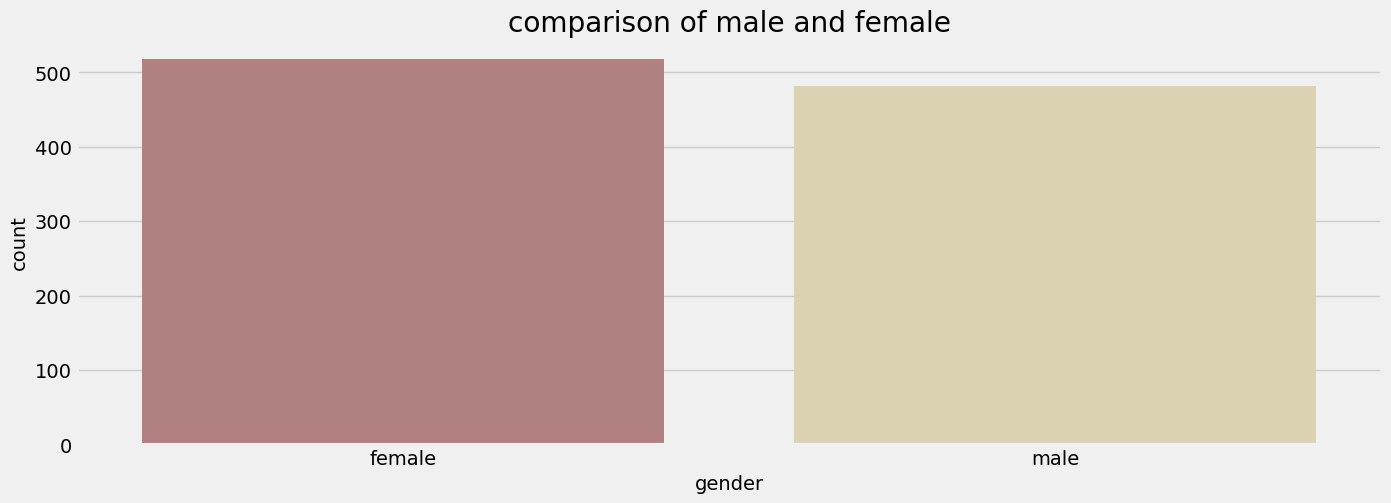

In [27]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(x=record.gender,palette="pink")
plt.title("comparison of various groups",fontweight)
plt.xlabel("group")
plt.ylabel("count")
plt.show()

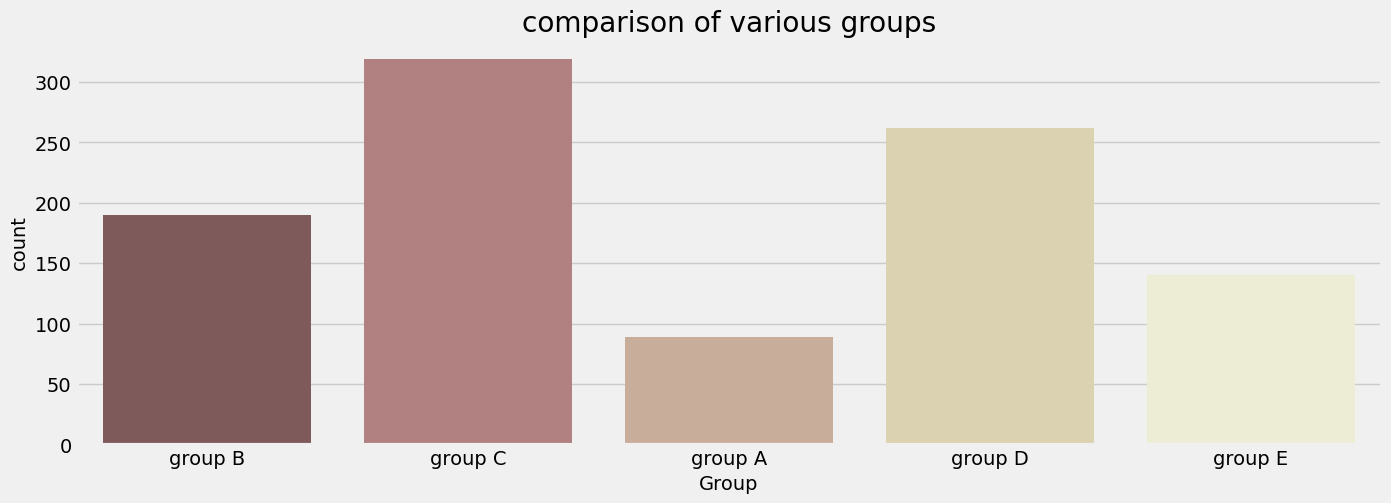

In [35]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(x=record['race/ethnicity'],palette="pink")
plt.title("comparison of various groups")
plt.xlabel("Group")
plt.ylabel("count")
plt.show()

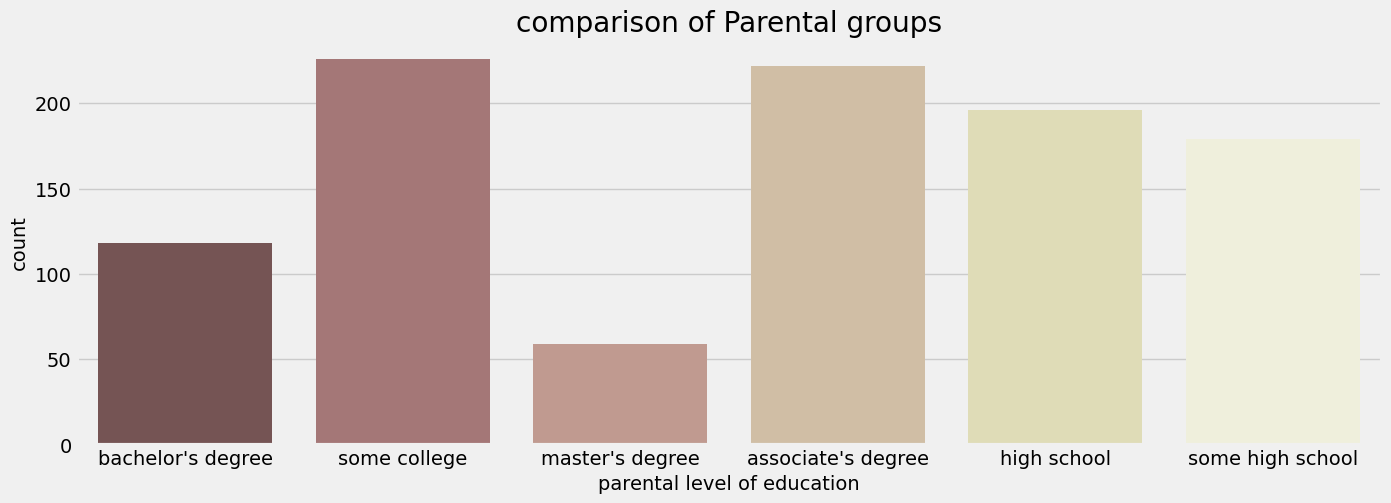

In [39]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(x=record['parental level of education'],palette="pink")
plt.title("comparison of Parental groups")
plt.xlabel("parental level of education")
plt.ylabel("count")
plt.show()

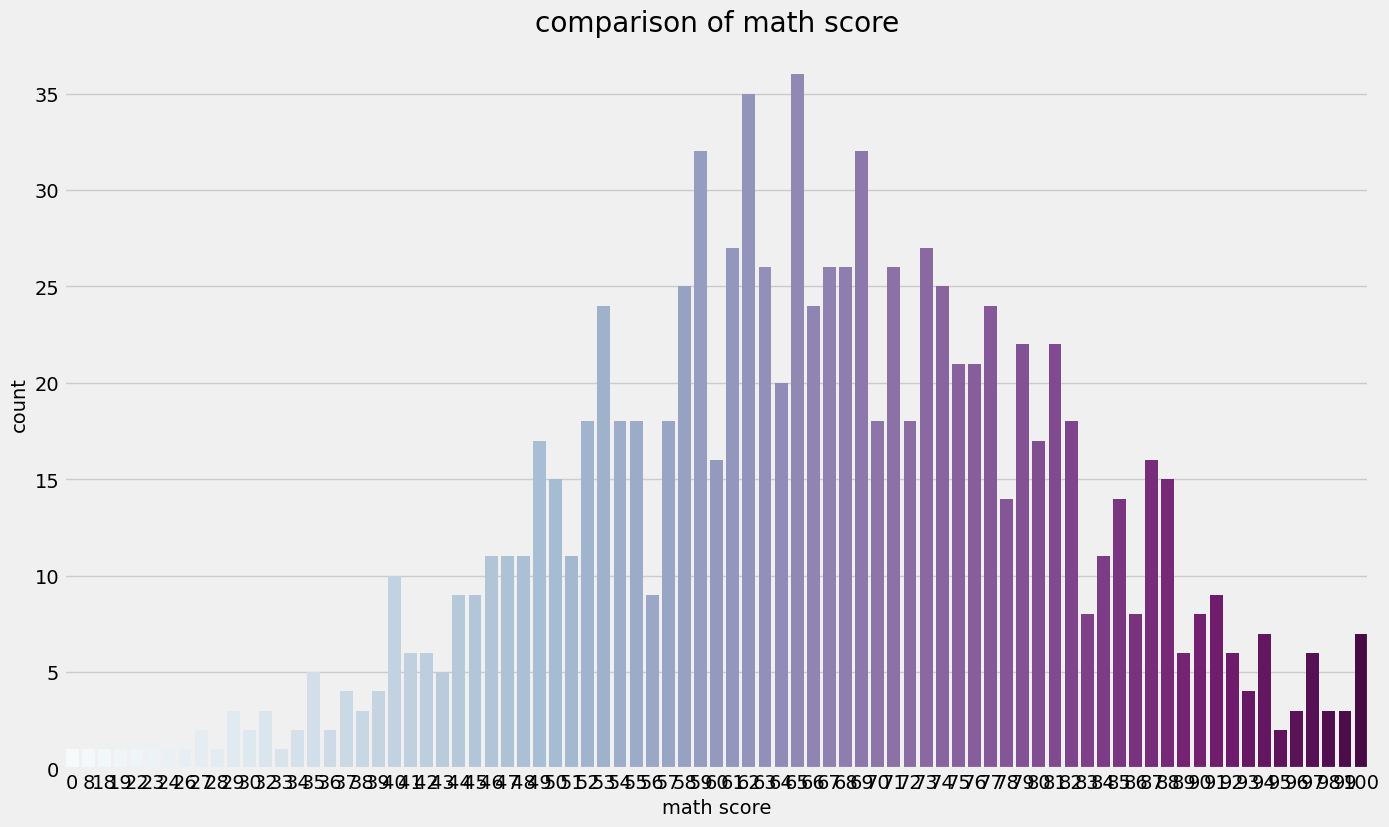

In [43]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('tableau-colorblind10')
sns.countplot(x=record['math score'],palette="BuPu")
plt.title("comparison of math score")
plt.xlabel("math score")
plt.ylabel("count")
plt.show()

In [44]:
record['total score']=record['math score']+record['reading score']+record['writing score']

In [45]:
record.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


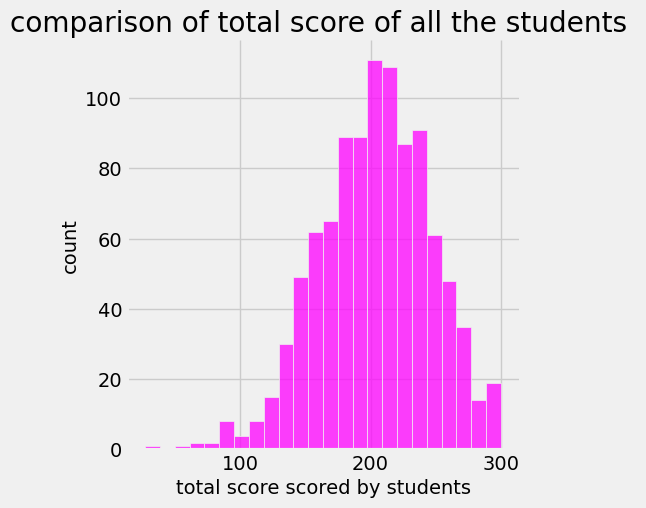

In [49]:
# warnings.filterwarnings('ignore')
sns.displot(x=record['total score'],color='magenta')
plt.title("comparison of total score of all the students ")
plt.xlabel('total score scored by students')
plt.ylabel('count')
plt.show()

/tmp/ipykernel_36153/893342327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['Percentage'][i]=ceil(record.Percentage[i])


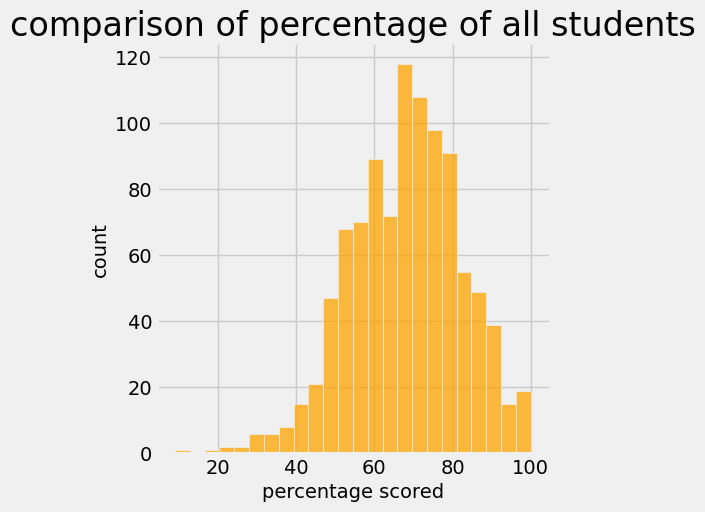

In [53]:
from math import *
for i in range(1000):
    record['Percentage'][i]=ceil(record.Percentage[i])
    
plt.rcParams['figure.figsize']=(15,9)
sns.displot(record.Percentage,color="orange")

plt.title("comparison of percentage of all students",fontweight=30,fontsize=24)
plt.xlabel("percentage scored")
plt.ylabel("count")







plt.show()

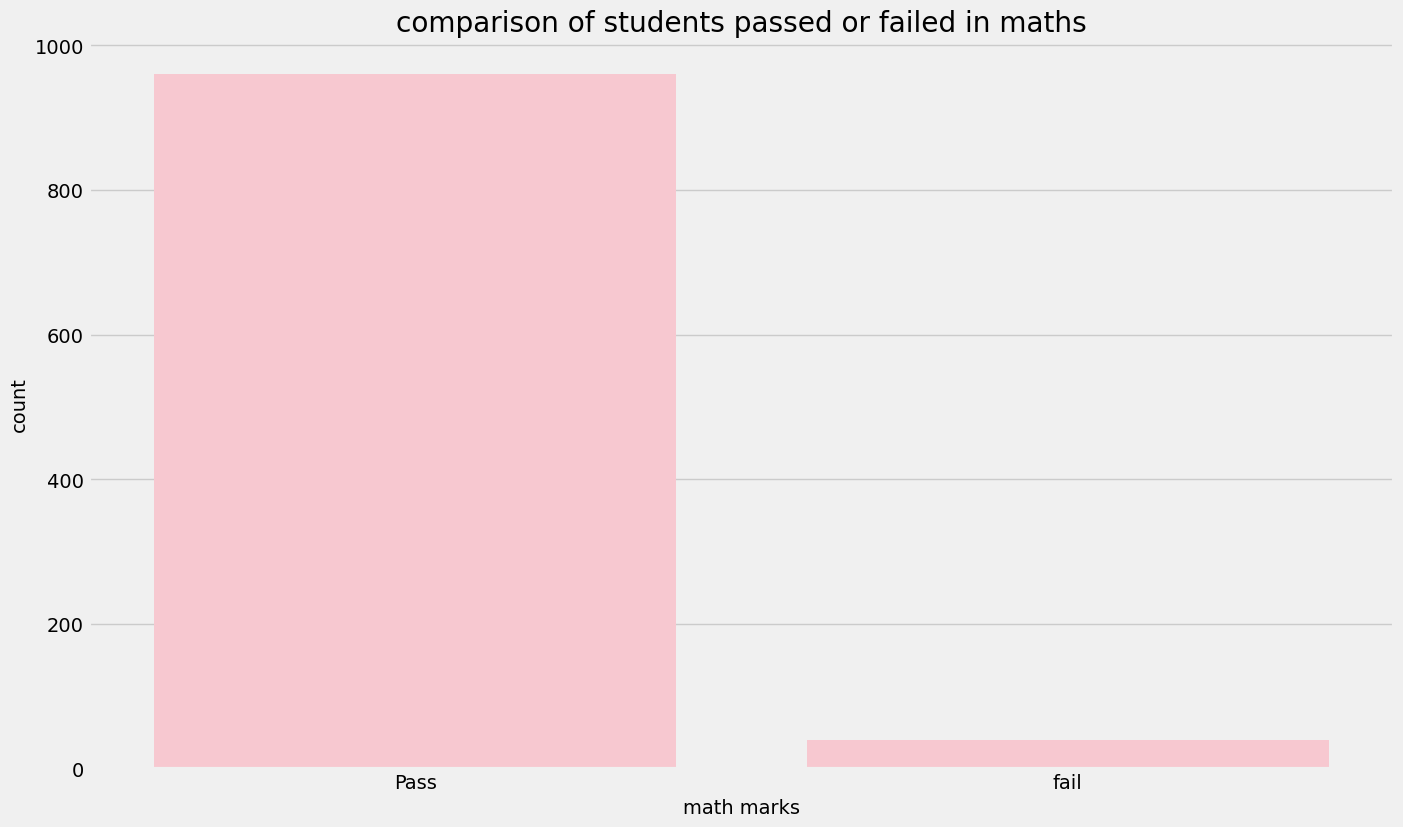

In [56]:
passmarks=40
record['pass math']=np.where(record['math score']<passmarks,'fail','Pass')
sns.countplot(x=record['pass math'],color="pink")
plt.title('comparison of students passed or failed in maths')
plt.xlabel("math marks")
plt.ylabel("count")
# plt.legend()
plt.show()

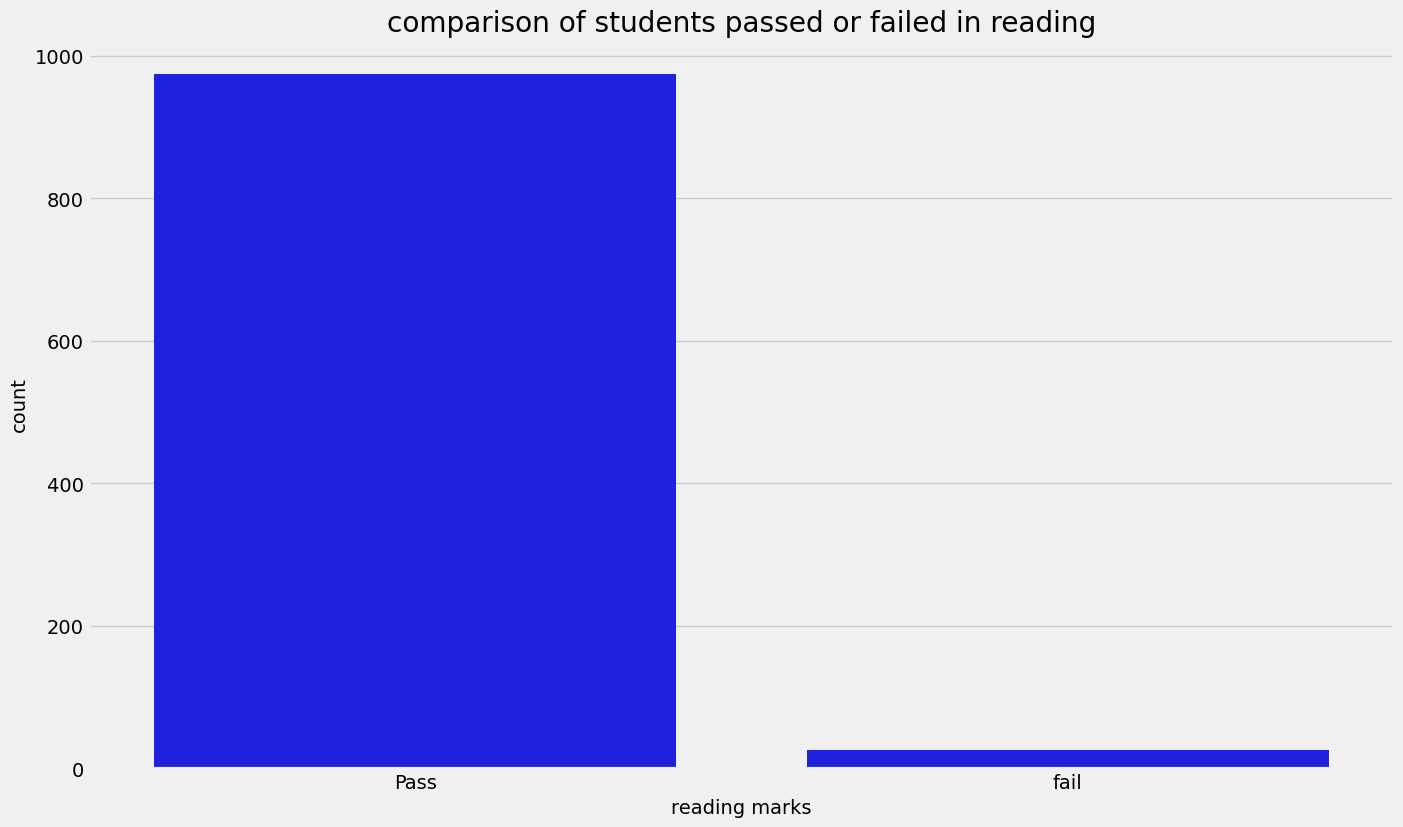

In [58]:
passmarks=40
record['pass reading']=np.where(record['reading score']<passmarks,'fail','Pass')
sns.countplot(x=record['pass reading'],color="blue")
plt.title('comparison of students passed or failed in reading')
plt.xlabel("reading marks")
plt.ylabel("count")
# plt.legend()
plt.show()

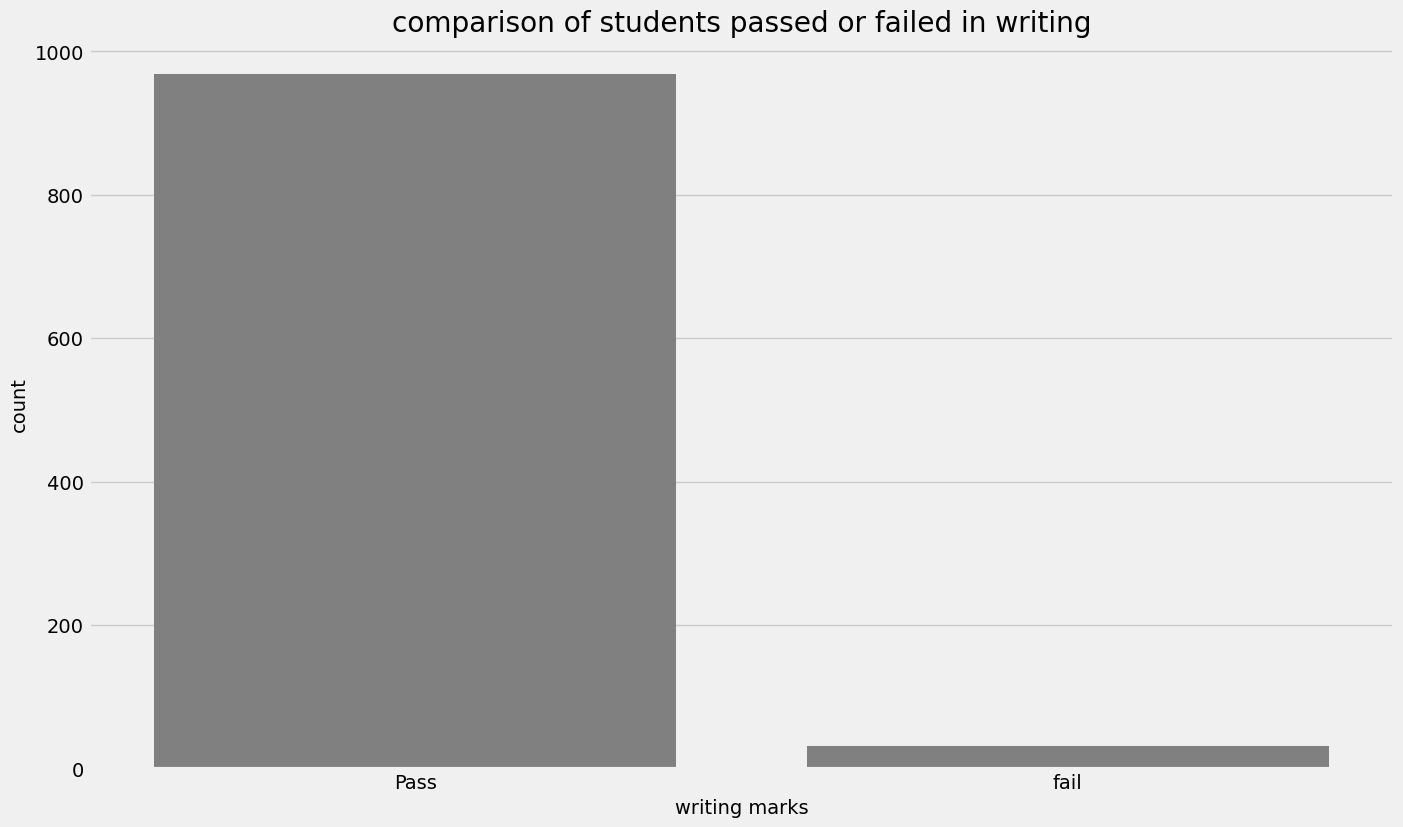

In [60]:
passmarks=40
record['pass writing']=np.where(record['writing score']<passmarks,'fail','Pass')
sns.countplot(x=record['pass writing'],color="grey")
plt.title('comparison of students passed or failed in writing')
plt.xlabel("writing marks")
plt.ylabel("count")
# plt.legend()
plt.show()